In [1]:
import torch
import math
import numpy as np
from torch import nn
from typing import List, Tuple
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class Data:

    def create_binary_list_from_int(self, number: int) -> List[int]:
        if number < 0 or type(number) is not int:
            raise ValueError("Only Positive integers are allowed")
        return [int(x) for x in list(bin(number))[2:]]

    def generate_even_data(self, max_int: int, batch_size: int=16) -> Tuple[List[int], List[List[int]]]:
        # Get the number of binary places needed to represent the maximum number
        max_length = int(math.log(max_int, 2))

        # Sample batch_size number of integers in range 0-max_int
        sampled_integers = np.random.randint(0, int(max_int / 2), batch_size)

        # Create a list of labels all ones because all numbers are even
        labels = torch.tensor([1] * batch_size).float()

        # Generate a list of binary numbers of training
        data = [self.create_binary_list_from_int(int(x * 2)) for x in sampled_integers]
        data = torch.tensor([([0] * (max_length - len(x))) + x for x in data]).float()

        return labels, data
    
    def convert_float_matrix_to_int_list(self, float_matrix: np.array, threshold: float = 0.5) -> List[int]:
        return [int("".join([str(int(y)) for y in x]), 2) for x in float_matrix >= threshold]

In [3]:
class Generator(nn.Module):
    def __init__(self, input_length: int):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_length, input_length),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_length: int):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_length, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [4]:
class Experiment:
    
    def __init__(self, max_int: int, batch_size: int):
        self.data = Data()
        self.max_int = max_int
        self.batch_size = batch_size
        self.input_length = int(math.log(max_int, 2))
        self.generator = Generator(self.input_length)
        self.discriminator = Discriminator(self.input_length)
        self.generator_optimizer = torch.optim.Adam(self.generator.parameters(), lr=1e-3)
        self.discriminator_optimizer = torch.optim.Adam(self.discriminator.parameters(), lr=1e-3)
        self.criterion = nn.BCELoss()


    def run(self, train_steps):
        generator_losses = []
        discriminator_losses = []

        for i in tqdm(range(train_steps), "Training"):

            self.generator_optimizer.zero_grad()

            noise = torch.randint(0, 2, size=(self.batch_size, self.input_length)).float()
            generated_data = self.generator(noise)

            true_labels, true_data = self.data.generate_even_data(self.max_int, batch_size=self.batch_size)

            generator_discriminator_out = self.discriminator(generated_data)
            generator_loss = self.criterion(generator_discriminator_out, true_labels)
            generator_loss.backward()
            self.generator_optimizer.step()

            self.discriminator_optimizer.zero_grad()
            true_discriminator_out = self.discriminator(true_data)
            true_discriminator_loss = self.criterion(true_discriminator_out, true_labels)

            generator_discriminator_out = self.discriminator(generated_data.detach())
            generator_discriminator_loss = self.criterion(generator_discriminator_out, torch.zeros(self.batch_size))
            discriminator_loss = (true_discriminator_loss + generator_discriminator_loss) / 2
            discriminator_loss.backward()
            self.discriminator_optimizer.step()

            generator_losses += [generator_loss.item()]
            discriminator_losses += [discriminator_loss.item()]

        print(f"\n{i}:: {self.data.convert_float_matrix_to_int_list(generated_data)}")
        plt.figure(figsize=(25,5))
        plt.plot(generator_losses, label="Generator Loss")
        plt.plot(discriminator_losses, label="Discriminator Loss")
        plt.legend(loc='upper left')
        plt.show()


Training: 100%|██████████| 500/500 [00:00<00:00, 899.84it/s]

499:: [78, 10, 110, 126, 26, 90, 90, 26, 90, 26, 90, 26, 90, 78, 26, 90]


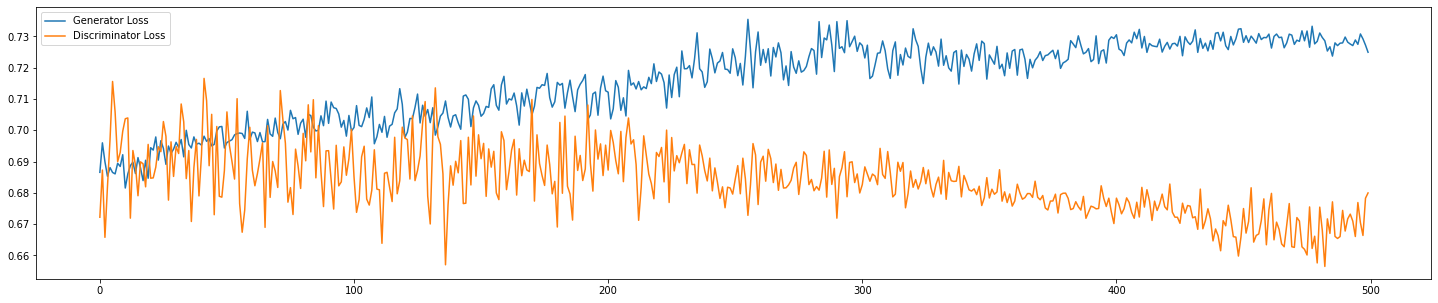

In [5]:
Experiment(128, 16).run(500)

Training: 100%|██████████| 500/500 [00:00<00:00, 894.20it/s]

499:: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 14, 8]


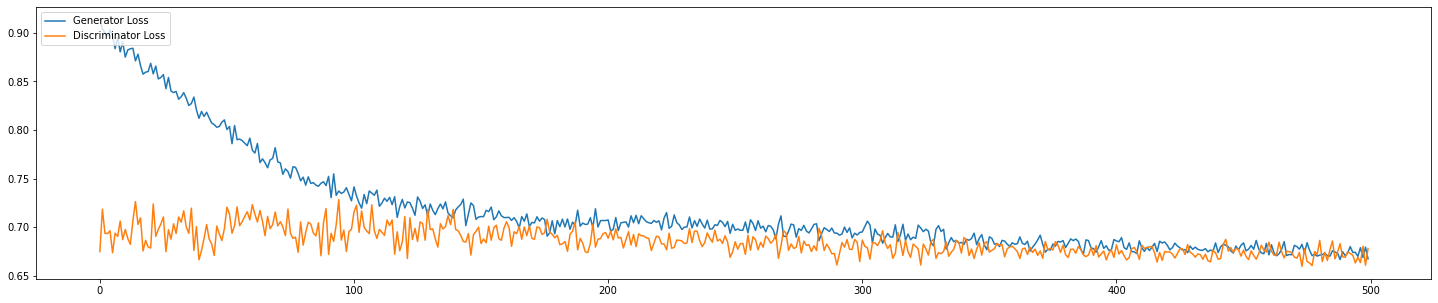

In [6]:
Experiment(128, 16).run(500)

Training: 100%|██████████| 500/500 [00:00<00:00, 901.61it/s]

499:: [102, 38, 102, 102, 102, 70, 70, 102, 38, 68, 102, 110, 76, 36, 78, 38]


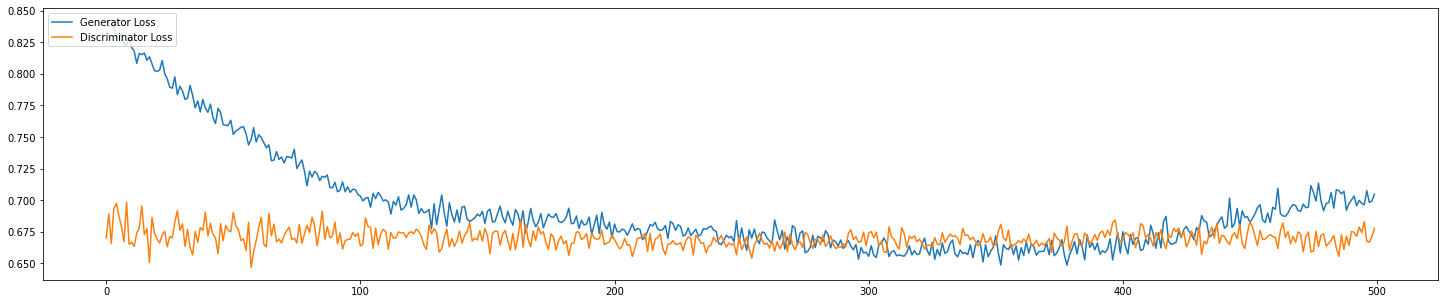

In [7]:
Experiment(128, 16).run(500)

Training: 100%|██████████| 500/500 [00:00<00:00, 868.28it/s]

499:: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


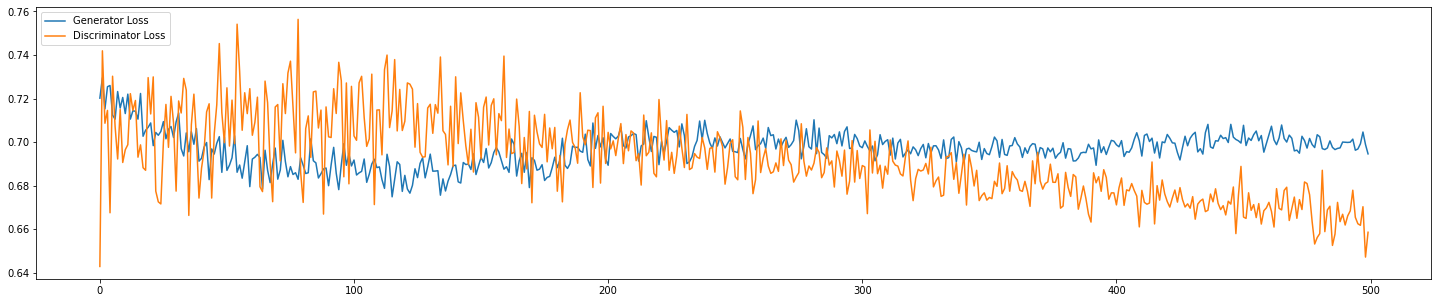

In [8]:
Experiment(128, 16).run(500)

Training: 100%|██████████| 500/500 [00:00<00:00, 888.12it/s]

499:: [30, 62, 60, 62, 124, 62, 62, 62, 62, 30, 62, 62, 62, 62, 62, 30]


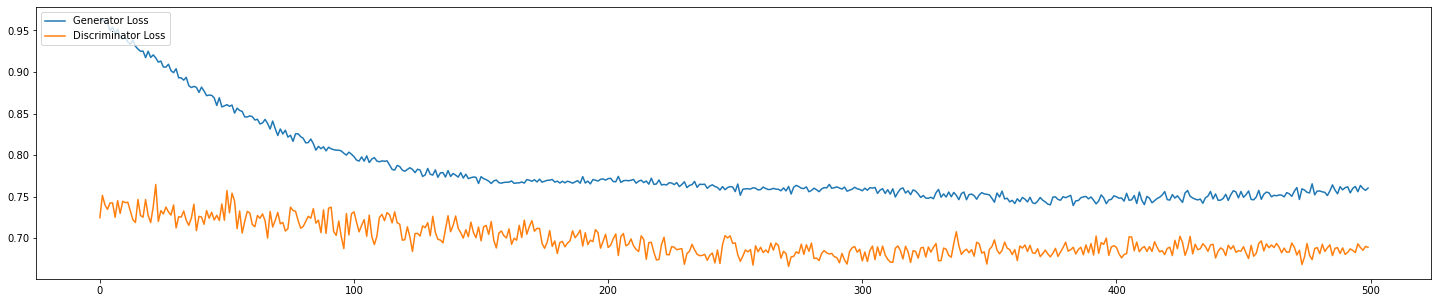

In [9]:
Experiment(128, 16).run(500)

Training: 100%|██████████| 500/500 [00:00<00:00, 856.65it/s]

499:: [30, 22, 4, 22, 22, 22, 22, 20, 22, 4, 23, 22, 22, 30, 30, 22]


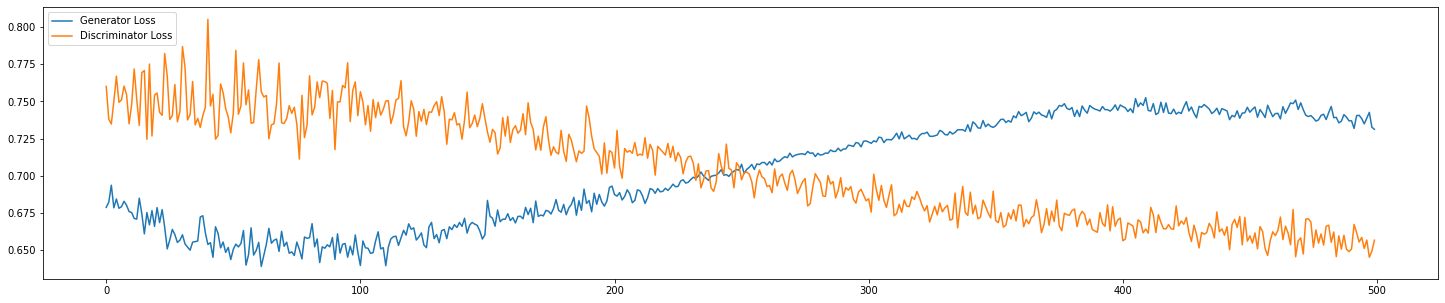

In [10]:
Experiment(128, 16).run(500)